In [104]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import numpy as np
from numpy import random
from datetime import datetime
from math import nan
from IPython.display import Image
from IPython.display import display

In [105]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### quick view on all dataset

#### 'matches' dataset

In [106]:
with sqlite3.connect('database.sqlite') as con:
    matches = pd.read_sql_query("SELECT * from Match", con)

In [107]:
matches.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
away_player_X9       1833
away_player_X10      1833
away_player_X11      1839
home_player_Y1       1821
home_player_Y2       1821
home_player_Y3       1832
home_player_Y4       1832
home_player_Y5       1832
home_player_

In [108]:
matches.shape

(25979, 115)

In [109]:
matches.head(1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,1.73,3.4,5.0,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,NaN,NaN,NaN,1.7,3.3,4.33,1.9,3.3,4.0,1.65,3.4,4.5,1.78,3.25,4.0,1.73,3.4,4.2


In [110]:
matches.league_id.value_counts()

1729     3040
4769     3040
21518    3040
10257    3017
7809     2448
13274    2448
17642    2052
15722    1920
19694    1824
1        1728
24558    1422
Name: league_id, dtype: int64

In [111]:
matches['id'].is_unique

True

In [112]:
matches['match_api_id'].is_unique

True

In [113]:
# Get rid of irrelevant gambling data
matches = matches.loc[:, 'id':'away_player_11']

In [114]:
matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
matches.isnull().sum()

id                     0
country_id             0
league_id              0
season                 0
stage                  0
date                   0
match_api_id           0
home_team_api_id       0
away_team_api_id       0
home_team_goal         0
away_team_goal         0
home_player_X1      1821
home_player_X2      1821
home_player_X3      1832
home_player_X4      1832
home_player_X5      1832
home_player_X6      1832
home_player_X7      1832
home_player_X8      1832
home_player_X9      1832
home_player_X10     1832
home_player_X11     1832
away_player_X1      1832
away_player_X2      1832
away_player_X3      1832
away_player_X4      1832
away_player_X5      1832
away_player_X6      1832
away_player_X7      1832
away_player_X8      1832
away_player_X9      1833
away_player_X10     1833
away_player_X11     1839
home_player_Y1      1821
home_player_Y2      1821
home_player_Y3      1832
home_player_Y4      1832
home_player_Y5      1832
home_player_Y6      1832
home_player_Y7      1832


In [116]:
matches.dropna(inplace = True)

In [117]:
matches.head(5)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0
153,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,3,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,36835.0,37047.0,37021.0,37051.0,104386.0,32863.0,37957.0,37909.0,38357.0,37065.0,78462.0,37990.0,21812.0,11736.0,37858.0,38366.0,37983.0,39578.0,38336.0,52280.0,27423.0,38440.0
155,156,1,1,2008/2009,25,2009-03-07 00:00:00,493027,8635,10000,2,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,34480.0,38388.0,26458.0,13423.0,38389.0,30949.0,38393.0,38253.0,38383.0,38778.0,37069.0,37900.0,37886.0,37903.0,37889.0,94030.0,37893.0,37981.0,131531.0,130027.0,38231.0,131530.0
162,163,1,1,2008/2009,26,2009-03-13 00:00:00,493034,8203,8635,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,38327.0,67950.0,67958.0,38801.0,67898.0,37112.0,67959.0,148286.0,164352.0,33657.0,26502.0,34480.0,38388.0,38389.0,31316.0,164694.0,30949.0,38378.0,38383.0,38393.0,38253.0,37069.0
168,169,1,1,2008/2009,26,2009-03-14 00:00:00,493040,10000,9999,0,0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,37900.0,37886.0,37100.0,37903.0,37889.0,37893.0,37981.0,131531.0,131530.0,38231.0,130027.0,38318.0,38247.0,16387.0,94288.0,94284.0,45832.0,26669.0,33671.0,163670.0,37945.0,33622.0


In [118]:
matches.shape

(21361, 77)

In [119]:
matches_p = matches.drop(columns = ['id', 'country_id','league_id','season', 'stage', 'home_team_api_id',
                                   'away_team_api_id'])

In [120]:
list(matches.columns).index('home_player_X1')

11

In [121]:
list(matches.columns).index('away_player_Y11')

54

In [122]:
position = matches.iloc[:,11:55]

In [123]:
position.head()

,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11
145,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0
153,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0
155,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0
162,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0
168,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0


In [124]:
position = position.astype(int)

In [125]:
position.dtypes

home_player_X1     int32
home_player_X2     int32
home_player_X3     int32
home_player_X4     int32
home_player_X5     int32
home_player_X6     int32
home_player_X7     int32
home_player_X8     int32
home_player_X9     int32
home_player_X10    int32
home_player_X11    int32
away_player_X1     int32
away_player_X2     int32
away_player_X3     int32
away_player_X4     int32
away_player_X5     int32
away_player_X6     int32
away_player_X7     int32
away_player_X8     int32
away_player_X9     int32
away_player_X10    int32
away_player_X11    int32
home_player_Y1     int32
home_player_Y2     int32
home_player_Y3     int32
home_player_Y4     int32
home_player_Y5     int32
home_player_Y6     int32
home_player_Y7     int32
home_player_Y8     int32
home_player_Y9     int32
home_player_Y10    int32
home_player_Y11    int32
away_player_Y1     int32
away_player_Y2     int32
away_player_Y3     int32
away_player_Y4     int32
away_player_Y5     int32
away_player_Y6     int32
away_player_Y7     int32


In [126]:
position_tag = position.columns

In [135]:
position.iloc[:, 1].value_counts().values

array([19630,  1296,   223,   169,    22,    15,     5,     1],
      dtype=int64)

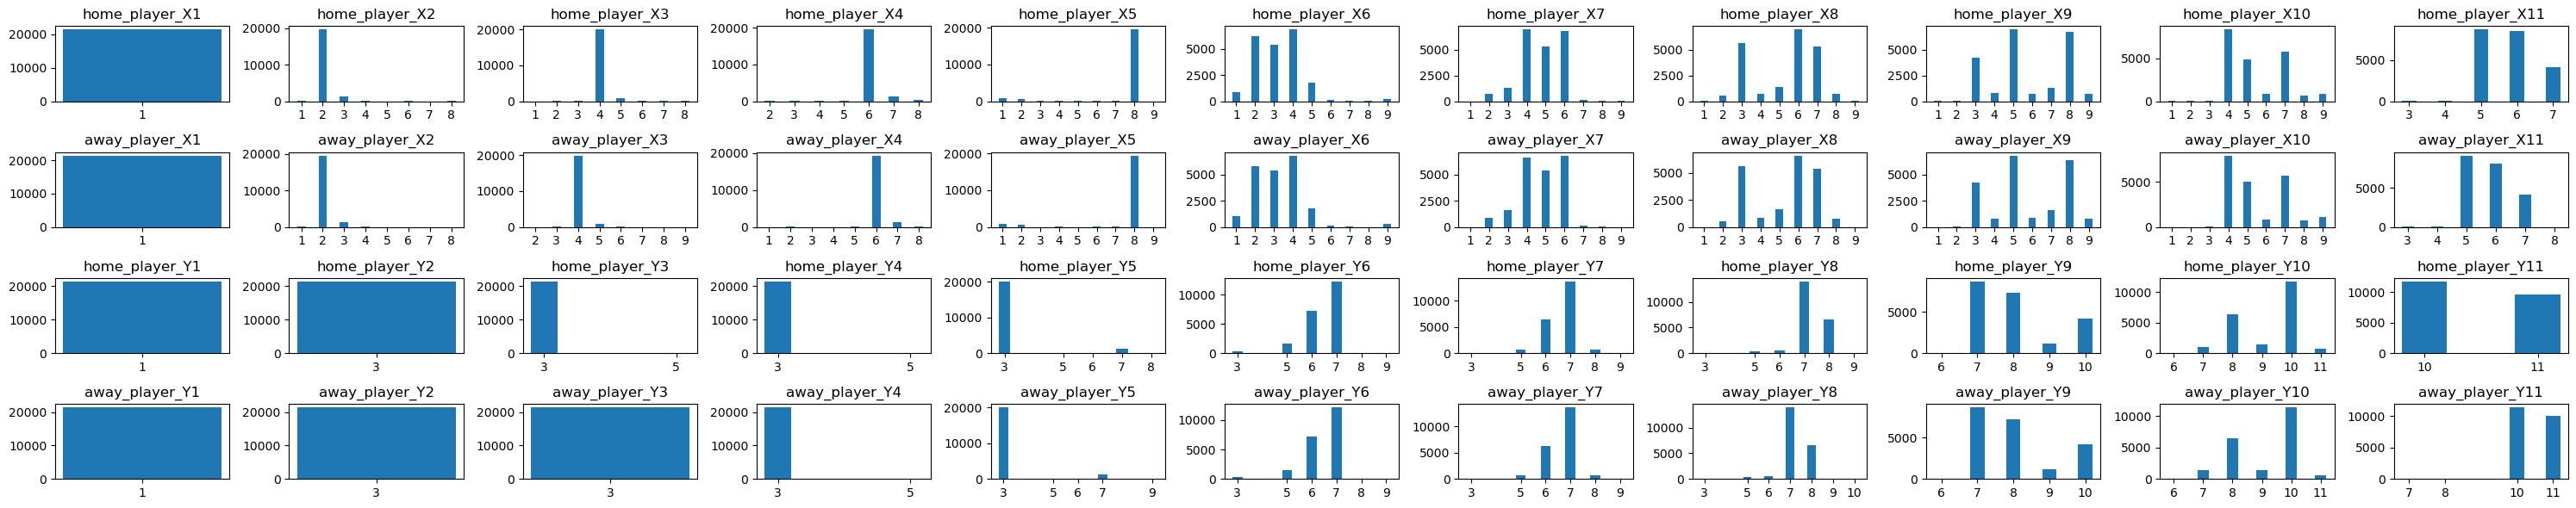

In [140]:
fig, ax = plt.subplots(4, 11, figsize = (30, 6))
a = ax.ravel()
for index,ax in enumerate(a):
    counts = position.iloc[:, index].value_counts()
    ax.bar(counts.index, counts.values, width = 0.4)
    ax.set_title(position_tag[index])
    ax.set_xticks(counts.index)
plt.tight_layout()

In [ ]:
matches.home_player_Y7.value_counts()

In [ ]:
position_graph = Image(filename = 'img/positions.jpg')

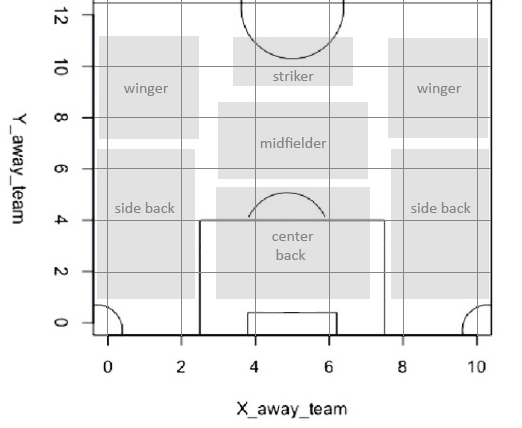

In [44]:
display(position_graph)

In [48]:
home_player_col = []
for i in range(1,12):
    home_player_col.append('home_player_' + str(i))
away_player_col = []
for i in range(1,12):
    away_player_col.append('away_player_' + str(i))
all_player_col = home_player_col + away_player_col

In [57]:
home_player_posX = []
for i in range(1,12):
    home_player_posX.append('home_player_X' + str(i))
away_player_posX = []
for i in range(1,12):
    away_player_posX.append('away_player_X' + str(i))
    
home_player_posY = []
for i in range(1,12):
    home_player_posY.append('home_player_Y' + str(i))
away_player_posY = []
for i in range(1,12):
    away_player_posY.append('away_player_Y' + str(i))

In [59]:
demo = matches_p.iloc[:3]

In [67]:
demo_P = demo[['match_api_id']+ home_player_col]  
demo_X = demo[['match_api_id']+ home_player_posX]
demo_Y = demo[['match_api_id']+ home_player_posY]

In [190]:
demoP_long = pd.wide_to_long(demo_P, stubnames=["home_player"], 
                            i="match_api_id", j="player_num", sep="_"
                           ).reset_index()
demoP_long = demoP_long.rename(columns = {'home_player': 'player_api_id'})

In [191]:
demoX_long = pd.wide_to_long(demo_X, stubnames=["home_player"], 
                            i="match_api_id", j="player_num", sep="_X"
                           ).reset_index()
demoX_long = demoX_long.rename(columns = {'home_player': 'X'})

In [192]:
demoY_long = pd.wide_to_long(demo_Y, stubnames=["home_player"], 
                            i="match_api_id", j="player_num", sep="_Y"
                           ).reset_index()
demoY_long = demoY_long.rename(columns = {'home_player': 'Y'})

In [193]:
demo_XY = pd.merge(demoX_long, demoY_long, on = ['match_api_id', 'player_num'])

In [211]:
demo_new = pd.merge(demoP_long, demo_XY, on = ['match_api_id', 'player_num'])

In [212]:
demo_new.head()

,match_api_id,player_num,player_api_id,X,Y
0,493017,1,38327.0,1.0,1.0
1,493025,1,36835.0,1.0,1.0
2,493027,1,34480.0,1.0,1.0
3,493017,2,67950.0,2.0,3.0
4,493025,2,37047.0,2.0,3.0


In [213]:
demo_new['Position'] = demo_new.apply(lambda row: 
                                      'W' if (row['X'] < 2.5 or row['X'] > 7.5) and row['Y'] > 7.5 else 
                                      ('ST' if row['X'] > 2.5 and row['X'] < 7.5 and row['Y'] > 7.5 else 
                                       ('MF' if row['X'] > 2.5 and row['X'] < 7.5 and row['Y'] > 4.5 and row['Y'] < 7.5 else
                                        ('CB' if row['X'] > 2.5 and row['X'] < 7.5 and row['Y'] < 4.5 else 
                                         ('SB' if (row['X'] < 2.5 or row['X'] > 7.5) and row['Y'] < 7.5 else '')))), axis = 1)

In [214]:
demo_new.sort_values(by = 'match_api_id', inplace = True)

In [198]:
demo_new.head(20)

,match_api_id,player_num,player_api_id,X,Y,Position
0,493017,1,38327.0,1.0,1.0,SB
30,493017,11,26502.0,6.0,10.0,ST
3,493017,2,67950.0,2.0,3.0,SB
27,493017,10,38801.0,4.0,10.0,ST
6,493017,3,67958.0,4.0,3.0,CB
24,493017,9,164352.0,8.0,7.0,SB
9,493017,4,67959.0,6.0,3.0,CB
21,493017,8,67898.0,6.0,7.0,MF
12,493017,5,37112.0,8.0,3.0,SB
18,493017,7,148286.0,4.0,7.0,MF


In [215]:
demo_new.drop(columns = ['player_num','X', 'Y'], inplace = True)

In [200]:
player_detail_n = player_detail.drop(columns = ['id','player_fifa_api_id', 'date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate'])

In [171]:
player_detail_n.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [201]:
player_avg = player_detail_n.groupby(by =['player_api_id'], as_index = False).mean().round(2)

In [180]:
player_avg.head()

,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2625,60.14,61.14,50.14,47.29,46.29,56.50,38.00,54.14,50.00,49.93,65.57,59.14,66.86,63.29,66.43,49.71,66.21,66.71,58.71,77.29,55.79,56.86,71.29,62.07,50.36,55.29,61.93,62.93,63.86,56.57,12.43,12.86,19.07,10.36,10.43
1,2752,69.38,70.38,36.43,37.43,75.33,54.81,20.43,44.86,30.43,18.86,59.57,55.57,41.62,42.19,43.33,60.86,44.57,57.43,56.52,60.90,82.24,19.57,80.29,71.43,31.43,52.43,35.43,71.10,70.67,65.57,11.10,6.10,7.10,9.10,15.10
2,2768,69.29,70.57,42.24,42.76,66.67,64.71,28.76,40.24,51.76,20.05,57.00,56.38,56.95,58.90,58.05,69.81,60.19,38.76,76.90,59.29,67.43,19.43,62.76,74.71,44.19,57.76,31.90,71.67,70.62,79.71,10.76,15.90,22.71,15.14,12.10
3,2770,71.13,73.53,61.87,67.67,67.80,72.53,67.13,75.07,79.80,68.67,70.27,76.73,62.20,59.80,62.60,65.93,61.27,68.33,57.13,51.00,62.60,73.00,56.80,44.93,64.53,71.60,63.93,30.20,37.53,25.00,8.67,15.67,27.20,16.33,17.00
4,2790,70.20,75.80,70.00,37.40,55.20,68.00,43.00,60.80,67.00,55.40,69.80,66.80,70.80,71.20,65.00,69.20,67.00,46.40,61.00,70.40,71.00,42.40,68.40,63.40,60.60,60.00,55.40,74.60,74.60,69.00,8.00,17.00,59.00,16.60,17.40


In [202]:
demo_new.player_api_id.is_unique

True

In [216]:
demo_merge = pd.merge(demo_new, player_avg, on = 'player_api_id', how = 'left')

In [217]:
demo_group = demo_merge.groupby(by = ['match_api_id','Position'], as_index = False).mean().round(2)

In [218]:
demo_group.head(20)

,match_api_id,Position,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,493017,CB,67958.5,65.97,68.40,52.82,48.80,59.62,62.78,44.66,59.12,50.60,52.46,62.38,64.36,60.93,65.15,63.75,64.25,64.65,61.09,62.19,76.81,71.60,60.29,65.52,64.81,59.33,64.94,53.24,61.42,63.08,65.97,10.10,11.72,22.29,13.68,15.99
1,493017,MF,108092.0,65.79,68.61,55.82,57.82,58.47,64.40,54.56,64.29,52.64,56.49,59.17,67.19,74.69,74.44,73.58,68.34,75.67,66.66,78.51,71.86,66.76,58.86,68.75,58.09,63.13,63.76,56.03,42.18,48.22,48.06,9.10,16.27,23.06,12.97,13.67
2,493017,SB,68826.8,62.25,66.22,45.65,39.49,48.78,50.99,36.11,43.75,42.06,44.28,50.39,54.64,56.20,57.70,51.69,60.63,62.02,48.12,58.13,60.37,65.38,48.26,56.18,53.30,48.00,55.26,46.93,45.47,46.49,51.19,20.04,23.84,39.22,23.79,26.75
3,493017,ST,32651.5,63.98,65.80,49.07,64.28,74.65,60.64,53.84,49.78,41.44,43.26,46.58,55.74,54.09,54.90,49.25,62.18,61.06,67.02,61.66,63.22,77.05,58.10,70.90,51.48,70.46,63.42,61.94,43.52,48.59,43.94,9.01,16.34,32.61,16.98,14.34
4,493025,CB,37036.0,62.84,63.80,51.89,59.07,64.96,58.36,46.86,46.25,44.70,48.50,55.00,56.16,58.20,62.93,58.54,58.30,63.16,62.72,64.93,76.11,64.37,53.39,63.52,58.98,59.36,62.68,54.77,62.40,62.02,62.09,6.78,14.82,24.32,13.96,13.16
5,493025,MF,37933.0,66.75,68.42,59.28,60.34,69.19,69.11,58.83,61.58,57.66,61.00,64.42,66.22,58.02,62.58,59.36,64.56,64.47,67.89,62.20,71.59,63.20,65.25,63.42,69.19,68.69,73.00,65.00,48.08,58.56,53.84,10.06,17.61,42.70,15.94,15.66
6,493025,SB,49897.6,66.86,68.59,54.12,49.24,45.76,59.54,50.97,54.48,50.95,55.11,58.59,58.55,66.08,65.92,66.58,67.55,63.55,57.49,65.99,62.28,59.51,54.46,54.06,53.88,56.12,62.92,58.57,42.73,44.40,46.09,20.92,22.91,37.89,24.89,24.32
7,493025,ST,57763.5,65.32,67.68,61.48,61.97,59.22,65.58,59.78,66.97,53.47,58.88,56.22,66.74,66.40,71.62,69.51,65.06,64.04,62.66,66.12,69.72,60.06,60.62,58.96,48.90,63.27,61.62,58.22,33.39,39.61,38.68,12.64,13.32,22.58,16.36,11.68
8,493027,CB,19940.5,69.39,70.78,56.03,39.12,73.94,61.66,35.12,40.63,39.86,53.22,56.81,53.54,51.96,57.38,51.23,64.19,59.36,65.68,65.98,70.88,79.33,53.37,77.10,68.66,46.60,52.92,62.66,68.78,71.46,71.52,7.06,14.91,19.45,10.34,8.69
9,493027,MF,38323.0,74.69,75.99,67.56,63.20,65.39,78.24,68.30,71.16,67.50,67.24,73.28,77.38,65.11,67.21,70.29,75.22,69.02,71.40,68.86,81.30,73.40,70.15,71.44,73.65,66.14,74.40,67.53,65.36,72.28,73.68,10.40,13.68,19.55,12.78,9.80


In [224]:
matches.query("match_api_id == 493017")

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,1,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,2.0,4.0,6.0,8.0,2.0,4.0,6.0,8.0,4.0,6.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,1.0,3.0,3.0,3.0,3.0,7.0,7.0,7.0,7.0,10.0,10.0,38327.0,67950.0,67958.0,67959.0,37112.0,36393.0,148286.0,67898.0,164352.0,38801.0,26502.0,37937.0,38293.0,148313.0,104411.0,148314.0,37202.0,43158.0,9307.0,42153.0,32690.0,38782.0


In [61]:
# Transform date column to show year only
matches['date'] = matches.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [62]:
matches['date'].value_counts(demo_new)

2015    3052
2012    2928
2014    2887
2013    2758
2011    2732
2010    2607
2009    2130
2016    1474
2008     806
Name: date, dtype: int64

In [63]:
matches.shape

(21374, 33)

#### 'player_detail' dataset

In [165]:
with sqlite3.connect('database.sqlite') as con:
    player_detail = pd.read_sql_query("SELECT * from Player_Attributes", con)

In [166]:
player_detail.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [150]:
player_detail.isna().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [167]:
# Transform date column to show year only
player_detail['date'] = player_detail.apply(lambda x:datetime.strptime(x['date'], '%Y-%m-%d %H:%M:%S').year, axis =1)

In [152]:
player_detail['date'].value_counts()

2013    38867
2014    32808
2015    31834
2007    16138
2016    14103
2012    12632
2011    11976
2010    10829
2009     8993
2008     5798
Name: date, dtype: int64

In [153]:
player_detail.columns

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

- Too many columns! Drop some ... arbitrarily .

In [154]:
player_detail.drop(columns = ['potential','gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'], inplace = True)

<AxesSubplot:>

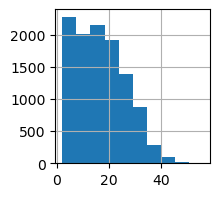

In [71]:
player_detail['player_api_id'].value_counts().hist(figsize = (2,2))

Note: 'player_api_id' has duplicates. Plot shows most of the players have 0-20 records of slightly different ratings.

- Run a overall check-out

In [72]:
to_plot = ['overall_rating','attacking_work_rate','defensive_work_rate', 
           'crossing', 'finishing', 'long_passing', 'ball_control',
           'acceleration', 'sprint_speed','agility','vision', 'sliding_tackle']

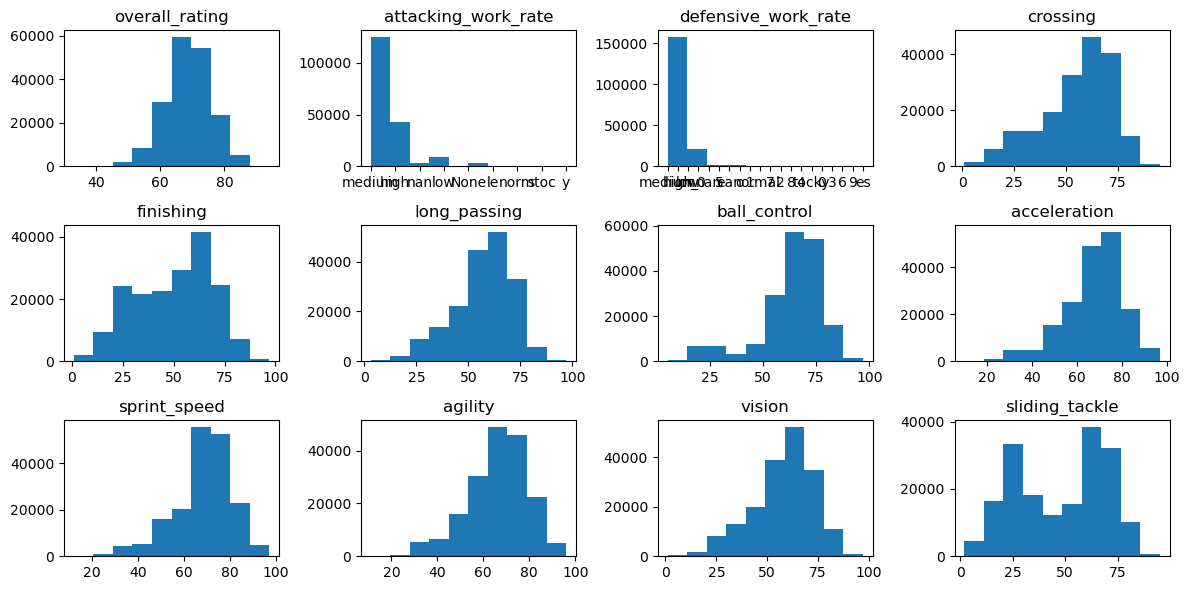

In [73]:
fig, ax = plt.subplots(3, 4, figsize = (12, 6))
a = ax.ravel()
for index,ax in enumerate(a):
    detail = [np.nan if x is None else x for x in player_detail.loc[:,to_plot[index]]]
    ax.hist(detail)
    ax.set_title(to_plot[index])
plt.tight_layout()

- Observation: The categories for attacking_work_rate and defensive_work_rate are not right

In [74]:
player_detail.attacking_work_rate.value_counts()

medium    125070
high       42823
low         8569
None        3639
norm         348
y            106
le           104
stoc          89
Name: attacking_work_rate, dtype: int64

In [75]:
player_detail.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
_0          2394
o           1550
1            441
ormal        348
2            342
3            258
5            234
7            217
0            197
6            197
9            152
4            116
es           106
ean          104
tocky         89
8             78
Name: defensive_work_rate, dtype: int64

Note: Drop row is one way, but that will remove useful information in other columns, so I replaced messy values with 'None'.

In [168]:
player_detail.loc[~player_detail['attacking_work_rate'].isin (['high', 'medium', 'low']), 'attacking_work_rate'] = 'None'

In [169]:
player_detail.loc[~player_detail['defensive_work_rate'].isin (['high', 'medium', 'low']), 'defensive_work_rate'] = 'None'

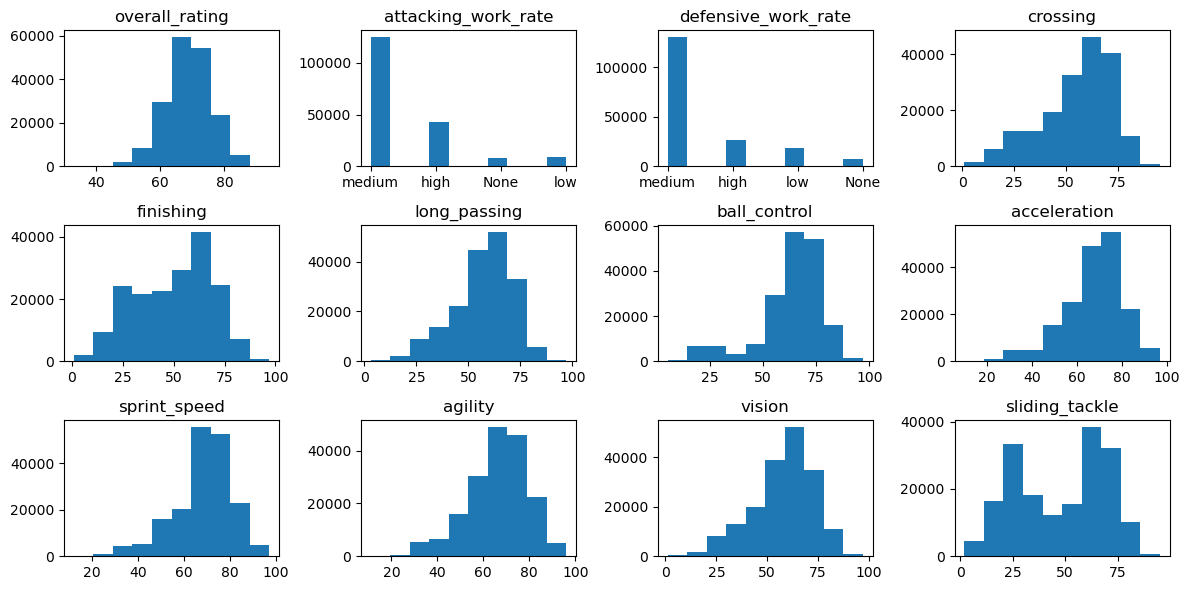

In [78]:
fig, ax = plt.subplots(3, 4, figsize = (12, 6))
a = ax.ravel()
for index,ax in enumerate(a):
    ax.hist(player_detail.loc[:,to_plot[index]])
    ax.set_title(to_plot[index])
plt.tight_layout()

### Combine

In [79]:
matches.drop(columns = ['country_id','season','stage','home_team_api_id', 'away_team_api_id'], inplace = True)

In [80]:
matches = matches.astype('int64')

In [81]:
home_player_col = []
for i in range(1,12):
    home_player_col.append('home_player_' + str(i))
away_player_col = []
for i in range(1,12):
    away_player_col.append('away_player_' + str(i))
all_player_col = home_player_col + away_player_col

In [82]:
'''Find players' rating that were rated on a certain attribute in the year closest to the match year. 
Find the mean of all 11 home players played in that game.'''

def get_attribute_home(df, attribute):
    
    player_attr = player_detail[['player_api_id','date',attribute]]
    player_attr = player_attr.groupby(by = ['player_api_id','date'], as_index = False).mean()
    player_attr = player_attr.sort_values(['date'], ascending = True)
    
    df_home = df[['match_api_id','date']+home_player_col]
    df_home_long = pd.wide_to_long(
        df_home, 
        stubnames=["home_player"], 
        i="match_api_id", 
        j="player_num", 
        sep="_"
    ).reset_index()
    df_home_long = df_home_long.sort_values(['date'], ascending = True)
    
    merge_home = pd.merge_asof(
       df_home_long, 
       player_attr, 
       left_by="home_player",
       right_by="player_api_id",
       on="date",
       direction="nearest"
    )
    merge_home = merge_home[['match_api_id', attribute]].groupby(by = 'match_api_id', as_index = False).mean()
    merge_home = merge_home.rename(columns = {attribute: 'home_'+attribute})
    
    return merge_home

In [83]:
'''Find players' rating that were rated on a certain attribute in the year closest to the match year. 
Find the mean of all 11 away players played in that game.'''

def get_attribute_away(df, attribute):
    
    player_attr = player_detail[['player_api_id','date',attribute]]
    player_attr = player_attr.groupby(by = ['player_api_id','date'], as_index = False).mean()
    player_attr = player_attr.sort_values(['date'], ascending = True)
    
    df_away = df[['match_api_id','date']+away_player_col]
    df_away_long = pd.wide_to_long(
        df_away, 
        stubnames=["away_player"], 
        i="match_api_id", 
        j="player_num", 
        sep="_"
    ).reset_index()
    df_away_long = df_away_long.sort_values(['date'], ascending = True)
    
    merge_away = pd.merge_asof(
       df_away_long, 
       player_attr, 
       left_by="away_player",
       right_by="player_api_id",
       on="date",
       direction="nearest"
    )
    merge_away = merge_away[['match_api_id', attribute]].groupby(by = 'match_api_id', as_index = False).mean()
    merge_away = merge_away.rename(columns = {attribute: 'away_'+attribute})
    
    return merge_away

In [84]:
'''Select a list of attributes for exploration'''
attr_list = ['overall_rating', 'crossing', 'finishing', 'long_passing', 'ball_control','volleys', 'dribbling',
           'acceleration', 'sprint_speed','agility','vision', 'standing_tackle', 'sliding_tackle']

In [85]:
def get_attr_all(df):
    df_new = df.iloc[:, :6]
    for attr in attr_list:
        home = get_attribute_home(df, attr)
        df_new = pd.merge(df_new, home, on = 'match_api_id', how = 'inner')
        away = get_attribute_away(df, attr)   
        df_new = pd.merge(df_new, away, on = 'match_api_id', how = 'inner')       
    return df_new

In [86]:
league_list = matches['league_id'].unique()

In [87]:
all_match = {}

In [88]:
for league in league_list:
    league_df = matches[matches['league_id'] == league]
    all_match[league] = get_attr_all(league_df)

In [89]:
all_match_df = pd.concat(all_match.values())

In [90]:
all_match_df.head()

,id,league_id,date,match_api_id,home_team_goal,away_team_goal,home_overall_rating,away_overall_rating,home_crossing,away_crossing,home_finishing,away_finishing,home_long_passing,away_long_passing,home_ball_control,away_ball_control,home_volleys,away_volleys,home_dribbling,away_dribbling,home_acceleration,away_acceleration,home_sprint_speed,away_sprint_speed,home_agility,away_agility,home_vision,away_vision,home_standing_tackle,away_standing_tackle,home_sliding_tackle,away_sliding_tackle
0,146,1,2009,493017,2,1,61.818182,66.045455,49.863636,55.318182,48.090909,50.227273,53.636364,58.909091,57.500000,62.636364,44.100000,53.727273,52.090909,57.136364,62.181818,69.181818,63.454545,68.454545,60.200000,65.363636,61.200000,60.818182,48.272727,47.545455,53.100000,49.272727
1,154,1,2009,493025,1,3,66.136364,68.818182,57.181818,58.318182,55.954545,56.590909,61.590909,62.500000,63.772727,63.500000,54.363636,54.818182,58.909091,59.181818,65.500000,63.954545,68.181818,70.227273,65.272727,63.818182,68.181818,67.545455,49.000000,49.772727,49.818182,46.909091
2,156,1,2009,493027,2,0,70.954545,63.545455,58.818182,52.090909,51.500000,44.454545,64.409091,56.227273,67.181818,58.090909,50.363636,47.181818,57.772727,49.500000,65.409091,63.863636,68.909091,66.272727,63.727273,64.363636,68.636364,66.000000,58.636364,49.772727,57.090909,51.000000
3,163,1,2009,493034,2,1,62.181818,70.954545,49.409091,56.818182,49.500000,50.318182,52.545455,62.590909,57.227273,66.181818,45.000000,50.090909,51.000000,57.681818,62.500000,68.181818,64.136364,69.727273,59.454545,63.454545,61.727273,64.545455,47.954545,58.454545,53.454545,56.727273
4,169,1,2009,493040,0,0,64.136364,61.909091,53.727273,48.454545,44.818182,44.863636,57.454545,54.500000,58.500000,55.000000,47.545455,53.750000,51.136364,49.909091,64.090909,61.454545,66.681818,63.545455,65.454545,66.250000,66.181818,61.750000,50.409091,47.681818,51.818182,49.750000


In [91]:
all_match_df.shape

(21374, 32)

In [394]:
all_match_df.to_csv('all_match_df.csv', index = False)